In [1]:
from photoid_process import ImagePreprocess, ImageAnalysis, ImageCluster

Ultralytics Version: 8.3.65
OpenCV Version: 4.7.0
Piexif Version: 1.1.3
PyTorch Version: 2.0.1
NumPy Version: 1.24.3


## 1. Image Rename

This section explains how to rename image files systematically in a given directory. Renaming images is useful when you want to standardize naming conventions or when you need to assign unique identifiers to images for easier management. The process involves iterating over the image files and applying a naming rule, i.e., the `format_string` (e.g., prefix, suffix, or sequential numbers).

### Key Steps:
- Loop through all image files in the specified directory.
- Apply the desired renaming rule, such as adding a prefix or suffix, or renumbering the images.
- Save the renamed images in the same or a new directory.
- **EXIF Data Handling**:
   - Extract the EXIF data (metadata) from the original image.
   - Rewrite the EXIF data into the renamed image to preserve the original metadata.
- **Important Reminder**:
   - Always keep a copy of the original images before renaming or processing them, to avoid any loss of data or metadata.


In [3]:
# Define your parameters
STUDY_SITE = "HongKong"
GROUP_ID = "01"
image_folder = "example_data/"
format_string = "{image_id}_{date_time}_{STUDY_SITE}_{GROUP_ID}_{frame_number}.jpg"

preprocessor = ImagePreprocess(study_site=STUDY_SITE, group_id=GROUP_ID)
preprocessor.rename_images(image_folder, format_string)

Renamed 12 images.


## 2. Single Image Detection

This section describes the process of detecting objects in a single image using a pre-trained object detection model (e.g., YOLO). This method allows you to quickly check the detection results on one image before running the model on a batch of images.

### Key Steps:
- Load a pre-trained object detection model (e.g., YOLO / pre-trained weight with your object of interest).
- Input the path of a single image for detection.
- Run the model on the image to detect objects.
- Visualize the results with bounding boxes around detected objects.


image 1/1 /Volumes/Derek/Research/Analysis/GitHub/Sousa-photoID-image-processing/example_data/0006_20240807_HongKong_01_1015.jpg: 544x800 1 dolphin-dorsalfin, 146.3ms
Speed: 4.2ms preprocess, 146.3ms inference, 8.0ms postprocess per image at shape (1, 3, 544, 800)


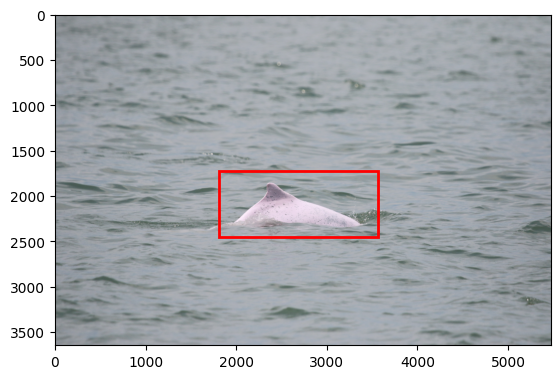

In [4]:
image_analysis = ImageAnalysis(input_dir='example_data/0006_20240807_HongKong_01_1015.jpg', 
                               model_name='weights/sousa_dorsal_fin.pt')
image_analysis.detect_single_image('example_data/0006_20240807_HongKong_01_1015.jpg')

## 3. Image Cropping with Batch Processing

In this section, we perform batch image processing, where images are cropped based on detected objects. For images without detected objects, the original image is copied to an `Uncropped` folder. Images that are cropped are stored in a separate `Cropped` folder.

### Key Steps:

#### Input and Output Folders:
- Create two folders within the `output_folder` directory: `Cropped` for cropped images, and `Uncropped` for images that have no detected objects.

#### Processing:
- Loop through each image in the input directory.
- Run object detection on each image.
- If objects are detected, crop the image based on bounding boxes.
- Save the cropped images in the `Cropped` folder and the uncropped ones in the `Uncropped` folder.

#### Directories:
- `Cropped`: Contains images that were cropped based on detected bounding boxes.
- `Uncropped`: Contains images where no objects were detected.


In [5]:
image_folder = 'example_data/' # Folder containing the images to be processed
output_folder = 'example_data/' # Output folder for the processed images
model_name = 'weights/sousa_dorsal_fin.pt'  # Path to YOLO model weights, can be changed to other pre-trained models

image_analysis = ImageAnalysis(image_folder, output_folder, model_name)
image_analysis.process_images()


image 1/1 /Volumes/Derek/Research/Analysis/GitHub/Sousa-photoID-image-processing/example_data/0006_20240807_HongKong_01_1015.jpg: 544x800 1 dolphin-dorsalfin, 135.7ms
Speed: 2.5ms preprocess, 135.7ms inference, 0.4ms postprocess per image at shape (1, 3, 544, 800)
Cropped image saved: example_data/Cropped/0006_20240807_HongKong_01_1015a.jpg

image 1/1 /Volumes/Derek/Research/Analysis/GitHub/Sousa-photoID-image-processing/example_data/0003_20240807_HongKong_01_0995.jpg: 544x800 1 dolphin-dorsalfin, 126.0ms
Speed: 2.9ms preprocess, 126.0ms inference, 0.4ms postprocess per image at shape (1, 3, 544, 800)
Cropped image saved: example_data/Cropped/0003_20240807_HongKong_01_0995a.jpg

image 1/1 /Volumes/Derek/Research/Analysis/GitHub/Sousa-photoID-image-processing/example_data/0002_20240807_HongKong_01_0994.jpg: 544x800 1 dolphin-dorsalfin, 131.1ms
Speed: 2.4ms preprocess, 131.1ms inference, 0.4ms postprocess per image at shape (1, 3, 544, 800)
Cropped image saved: example_data/Cropped/0002

## 4. Image Clustering using UMAP and KMeans

This section explains how to cluster images using UMAP for dimensionality reduction and KMeans for clustering. The goal is to group similar images, which can be useful for organizing large image datasets. However, the results may not be 100% accurate and may require human assessment or checking.

### Key Steps:

#### Feature Extraction:
- Use a pre-trained model (e.g., ResNet50) to extract feature vectors from images.

#### Dimensionality Reduction (UMAP):
- Use UMAP to reduce the feature vectors to 2D for easier visualization.

#### Clustering with KMeans:
- Apply KMeans clustering to group the images based on their reduced features.

#### Visualizing Results:
- Display images from each cluster to check the results.

#### Result Storage:
- Organize the images into folders based on their cluster.

### Note:
- The clustering results may not be perfect and should be verified by humans.


Images have been categorized into 5 clusters using UMAP and K-Means.


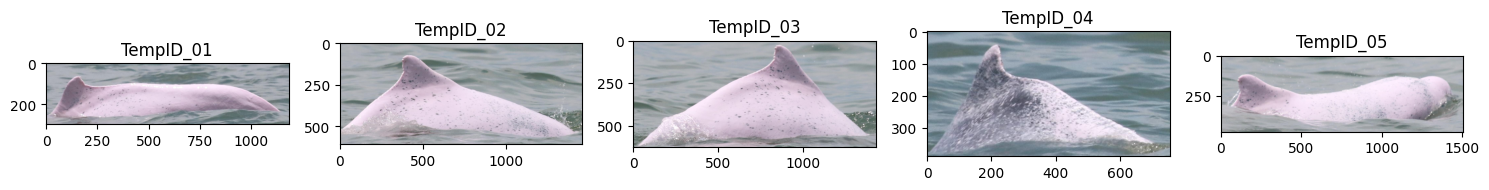

In [6]:
input_dir = 'example_data/Cropped' 
image_cluster = ImageCluster(input_dir, n_individuals=5) # n_individuals is the number of individuals to cluster, can use sighting info as prior information
image_cluster.process_images()
image_cluster.display_clusters() 